In [1]:
import numpy as np
import matplotlib.pyplot as plt

# inital

In [2]:
a = 2
b = 3
x0 = (a, 1)
epsilon = 1e-15

In [3]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 0.5*(x1**2 + (a * x2**2)) - np.cos(b * (x1 + x2))

In [4]:
def f_gradient(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([(x1 + np.sin(b)),
                     (a*x2 + np.sinc(b))])

# steepest-descent method

In [5]:
def steepest_descent(x, max_iterations, t):
    x_hist = []
    x_hist.append(x)
    results = []
    results.append(f(x))
    k = 1
    while True:
        x = x + (t * -f_gradient(x))
        x_hist.append(x)
        results.append(f(x))
        if k == max_iterations or abs(results[-1] - results[-2]) <= epsilon:
            break
        else:
            k += 1
    return x_hist, results

In [6]:
def plot_result(x):
    x1_plot = [float(x[0]) for x in x]
    x2_plot = [float(x[1]) for x in x]

    xlist = np.linspace(-2.5, 10.0, 100)
    ylist = np.linspace(-3.5, 3.5, 100)
    X, Y = np.meshgrid(xlist, ylist)
    Z = 1/2 * (X**2 + (a * Y**2))
    fig, ax = plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.plot(x1_plot, x2_plot)
    plt.show()

# find x*, p* by steepest-descent method

p* = -0.9999178422498171
x_k [(2, 1), array([1.892944, 0.9     ]), array([1.7912408, 0.81     ]), array([1.69462276, 0.729     ]), array([1.60283562, 0.6561    ])]
k iterations: 638


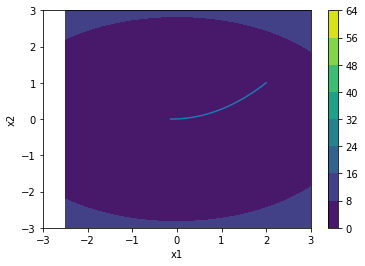

In [7]:
t = 0.05
max_iterations = -1
x_hist,f_SD_t1 = steepest_descent(x0,max_iterations,t)
p_opt = min(f_SD_t1)
print('p* =',p_opt)
print('x_k',x_hist[:5])
print('k iterations:', len(x_hist))
plot_result(x_hist)

p* = -0.9999163795154666
x_k [(2, 1), array([1.678832, 0.7     ]), array([1.4058392, 0.49     ]), array([1.17379532, 0.343     ]), array([0.97655802, 0.2401    ])]
k iterations: 210


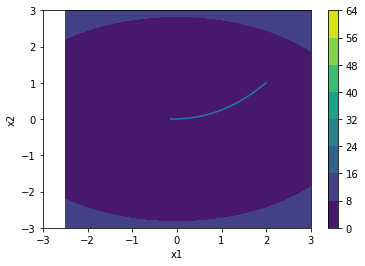

In [8]:
t = 0.15
max_iterations = -1
x_hist,f_SD_t1 = steepest_descent(x0,max_iterations,t)
p_opt = min(f_SD_t1)
print('p* =',p_opt)
print('x_k',x_hist[:5])
print('k iterations:', len(x_hist))
plot_result(x_hist)